# 14. Lexicons

Lists of frequent words can help us to develop an rough understanding of the main concerns of the text. They don't necessary offer insights on the broader topics or the themes that are discussed within the text. If we want to investigate the semantics of the text at a somehwat deeper level, it can be useful to make use of word lists which map the words that occur in a text to broader pre-defined semantic categories. Such lists of words are often referred to a 'lexicons'. We can make a lexicon listing words related to 'religion', for instance. Next, by counting the numbers of times a text uses one of the words on the lexicon, we can form an impression of the importance of this particular theme within this text.  

Examples of applications which have implemented this type of 'semantic tagging' include
the [Harvard General Inquirer (HGI)](http://www.wjh.harvard.edu/~inquirer/homecat.htm), [the Linguistic Inquiry and Word Count (LIWC)
tool](http://liwc.wpengine.com/)  and the [UCREL Semantic Analysis System (USAS)](http://ucrel.lancs.ac.uk/usas/). The programmers responsible for the *Harvard General Inquirer*, for example, have defined 182 semantic categories, and they have compiled long list of words pertaining to these categories.  

To let you work with the possibilities of semantic tagging, a number of the lexicons that have been made available have been downloaded and merged. Next to the lexicons developed for the HGI and USAS, the word lists created for this course also include terms taken from lists compiled by [Bing Liu](https://www.cs.uic.edu/~liub/) and by the project team that worked on the [Multi-Perspective Question Answering (MPQA) tool](http://mpqa.cs.pitt.edu/). 

The merged semantic lexicons can be found here: 
https://github.com/peterverhaar/semantic-tagging/tree/main/Lexicons


In the code below, the lexicon files that are available are all mentioned in the list named `lexicon_files`. The code downloads all of these lexicon files, and saved these in a dictionary named `lexicons`. 

In [1]:
import re
import requests
import os

baseUrl = 'https://raw.githubusercontent.com/peterverhaar/semantic-tagging/main/Lexicons/'
lexicon_files = [  'Academic.txt' , 'Economics.txt' ,  'Legal.txt' , 'Military.txt' , 'Movement.txt' , 'Pain.txt' , 'Passive.txt' , 'Pleasure.txt' , 'Politics.txt' , 'Power.txt' , 'Religion.txt' , 'Space.txt' , 'Time.txt' , 'Transportation.txt' , 'Vice.txt' , 'Weather.txt' , 'workAndEmployment.txt' ]

dir = 'Lexicons'
if not os.path.isdir(dir):
    os.mkdir(dir)


for l in lexicon_files:
    topic = l[ : l.rindex('.') ]
    response = requests.get( baseUrl + l)
    words = []
    if response:
        response.encoding = 'utf-8'
        out = open( os.path.join( dir , l ) , 'w' , encoding = 'utf-8' )
        out.write( response.text )
        out.close()

print('Lexicons have been downloaded!')

Lexicons have been downloaded!


Alternatively, you can also work with create your own lexicon files. A lexicon file is simple a text file listing all the terms that are relevant. You can create new files, and add these to the directory `Lexicon`. You can also edit existing lexicons, or remove those lexicons that are not relevant to you. 

The following code reads in all the lexicon files from `Lexicons` and saves all the words on these lists in a dictionary named `lexicons`.

In [2]:
import os 
from os.path import join
import re

lexicons = dict()

dir = 'Lexicons'

for file in os.listdir(dir):

    topic = file[ : file.rindex('.') ]
    words = []
    
    with open( join(dir,file) , encoding = 'utf-8' ) as file_handler:   
        for l in file_handler: 
            if re.search( r'\w' , l ):
                words.append(l.strip())

    lexicons[topic] = words    


You can use the code below to count the number of occurrences of the words in these various lexicons within the texts of your corpus. The code searches in lemmatised versions of all the corpus texts. The result (consisting of counts for all the texts in your corpus) is stored in a file named 'lexicon.csv'.

If your texts are long, or if the corpus contains many texts, running the code make take quite a while. 

In [3]:
import os
from os.path import join
from tdmh import *
from nltk.stem import WordNetLemmatizer

dir = 'Corpus'

csv = open( 'lexicon.csv' , 'w' , encoding = 'utf-8' )

## print header
csv.write( 'title' )
for l in lexicons:
    csv.write( f',{l.lower().strip() }' )
csv.write('\n')

dir = 'Corpus'
for file in os.listdir( dir ):
    if re.search( r'\.txt$' , file ):
        csv.write( remove_extension( file ) )
        path = join( dir, file )
        
        print( '\nLemmatising {} ...'.format( file ) )
        with open( path , encoding = 'utf-8' ) as fh:
            full_text = fh.read()
        lemmatised = lemmatise(full_text)
        
        print( 'Performing semantic tagging for {} ...'.format( file ) )
        
        words = word_tokenize(lemmatised)
        words = remove_punctuation(words)
        freq = dict()
        for w in words:
            freq[w] = freq.get(w,0)+1
        tokens = len(lemmatised)
        
        for l in lexicons:
            print(f'{l} ...')    
            
            countOccurrences = 0
            for word in l:
                countOccurrences += freq.get(word,0)
            
            csv.write( ',{}'.format( countOccurrences / tokens ) )
        csv.write('\n')
        
csv.close()

print("Done!")




Lemmatising sonnet116.txt ...
Performing semantic tagging for sonnet116.txt ...
Power ...
Movement ...
Weather ...
Space ...
Transportation ...
Time ...
Vice ...
Pain ...
Politics ...
Legal ...
workAndEmployment ...
Academic ...
Religion ...
Economics ...
Military ...
Passive ...
Pleasure ...

Lemmatising Ullyses.txt ...
Performing semantic tagging for Ullyses.txt ...
Power ...
Movement ...
Weather ...
Space ...
Transportation ...
Time ...
Vice ...
Pain ...
Politics ...
Legal ...
workAndEmployment ...
Academic ...
Religion ...
Economics ...
Military ...
Passive ...
Pleasure ...

Lemmatising BraveNewWorld.txt ...
Performing semantic tagging for BraveNewWorld.txt ...
Power ...
Movement ...
Weather ...
Space ...
Transportation ...
Time ...
Vice ...
Pain ...
Politics ...
Legal ...
workAndEmployment ...
Academic ...
Religion ...
Economics ...
Military ...
Passive ...
Pleasure ...

Lemmatising PrideandPrejudice.txt ...
Performing semantic tagging for PrideandPrejudice.txt ...
Power ...
Move

In the cell below, the counts that have made for the terms from the various lexicons can be visualised as a bar chart. As the value of the variable named `y`, you need to type in the name of the lexicon, without the .txt extension. 

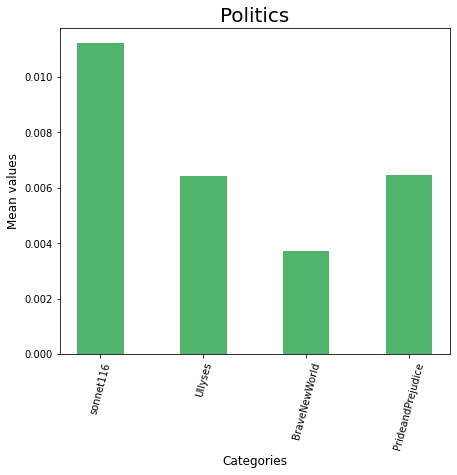

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('lexicon.csv')

fig = plt.figure( figsize=( 7 ,6 ) )
ax = plt.axes()

x = 'title'
y = 'politics'


bar_width = 0.45
opacity = 0.8

ax.bar( df[x] , df[y] , width = bar_width, alpha = opacity , color = '#23a145')

plt.xticks(rotation= 75)

ax.set_xlabel('Categories' , fontsize= 12)
ax.set_ylabel('Mean values' , fontsize = 12 )
ax.set_title( y.title() , fontsize=20 )


plt.show()

### Exercise 14.1

Using the lexicon 'Religion.txt', can you find all the terms in *Ullyses* that are related to religion? 